# Imports

In [ ]:
import pandas as pd, numpy as np
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
# %cd /gdrive

Mounted at /gdrive


## Read in data

In [ ]:
path = '/gdrive/MyDrive/Springboard/7 Data Wrangling/Capstone 2/train.csv'
df = pd.read_csv(path)

In [ ]:
# Id is index, drop this

df = df.drop(columns='Id')

In [ ]:
# others to drop that just don't make sense after analysis from EDA

df = df.drop(columns=['MiscFeature', 'MiscVal', 'MoSold', 'YrSold'])

In [ ]:
# extract target

y = df['SalePrice'].copy()

In [ ]:
# Create skeleton for hyperparamter dictionary

hyperdf = pd.DataFrame(columns=['Features', '# of features', 'Train MAE', 'Test MAE', \
                                'Train RMSE', 'Test RMSE', 'Model Type', 'Notes'])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import numpy.random as npr

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Choose "random" indices (per our discussion last time, I think I don't need to
# randomly choose train/test splits)
# or at least we need to know what the indices are for train and test

size = int(0.8*len(y))
train_indices = npr.choice(y.index, size=size, replace=False)
train_indices

array([ 213, 1294,    4, ..., 1311, 1415, 1163])

In [ ]:
test_indices = np.array( list(set(np.array(y.index)).difference(set(train_indices))) )
test_indices

array([   1, 1018, 1028,    5, 1029, 1031,   10, 1034,   17,   18, 1041,
        532, 1042,  540,   32,   33,  549,   38,  551,  553,   42,  555,
       1066, 1068, 1071,   48,   50, 1074,   52,  564,   55,  567,  569,
         58,   61, 1086,  576,  578, 1096,  587,  588, 1099,  591,  599,
       1111,  603,  101,  614,  615, 1125, 1127,  106, 1138,  116,  633,
        122, 1147,  639, 1152,  641,  646,  135,  650,  139,  140, 1164,
        654,  655, 1168,  657,  662,  664,  665,  666,  158,  159,  160,
        673, 1182,  675,  676, 1190,  680,  171,  172,  175, 1199, 1200,
       1201, 1210, 1212,  189,  702,  192,  704,  196, 1220,  198,  710,
        712,  201,  202, 1222, 1224, 1225,  206, 1228, 1231,  209,  723,
       1236, 1238,  727,  731,  220, 1245,  225,  737,  741,  743,  233,
       1257,  235,  749,  750,  240,  753,  754, 1265, 1268, 1269,  758,
       1270, 1272,  249,  761,  252, 1276, 1277,  257,  258,  264,  267,
        268,  271,  272,  783, 1296,  275, 1297,  2

In [ ]:
# get rid of indices tuple, use train_indices and test_indices
indices = (train_indices, test_indices)
indices[0].shape, indices[1].shape

((1168,), (292,))

# Define regression function

In [ ]:
# define function which outputs all info we need when testing new hyperparameters

def regress(X, y, indices, Notes='', scale=False, model=LinearRegression()):
  '''
  Fits a model on the features "X" and targets "y"
  default is a LinearRegression model

  X and y are pandas DataFrames

  indices is a tuple with numpy arrays indicating the indices for train and
    test set
    The first element in the tuple indicates the train indices

  returns a dictionary with relevant hyperparameters and metrics
  '''

  X_train, X_test, y_train, y_test = X.iloc[indices[0]].copy(), X.iloc[indices[1]].copy(), \
      y.iloc[indices[0]].copy(), y.iloc[indices[1]].copy()

  if scale:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

  # defining the model
  model = LinearRegression()

  # train/fit the model
  model.fit(X_train, y_train)

  # create hyperparameter dictionary
  hypers = {'Features':X.columns, '# of features':len(X.columns), \
            'Train MAE':mean_absolute_error(y_train, model.predict(X_train)), \
            'Test MAE':mean_absolute_error(y_test, model.predict(X_test)), \
            'Train RMSE':mean_squared_error(y_train, model.predict(X_train)) ** 0.5, \
            'Test RMSE':mean_squared_error(y_test, model.predict(X_test)) ** 0.5, \
            'Model Type':model, \
            "Notes":Notes}

  return hypers

## 1st iteration

- Take the single most correlated feature

In [ ]:
feats = ['OverallQual']
X = df[feats].copy()

In [ ]:
out = regress(X, y, indices, Notes='baseline using single most correlated feature')
out

{'Features': Index(['OverallQual'], dtype='object'),
 '# of features': 1,
 'Train MAE': 33091.309834752814,
 'Test MAE': 35858.98508943216,
 'Train RMSE': 47938.1887585623,
 'Test RMSE': 51141.625576100436,
 'Model Type': LinearRegression(),
 'Notes': ''}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf

,Features,# of features,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type,Notes
0,"Index(['OverallQual'], dtype='object')",1,33091.309835,35858.985089,47938.188759,51141.625576,LinearRegression(),baseline using single most correlated feature
1,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28377.743000,29889.233567,42351.879086,42973.335333,LinearRegression(),
2,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",18,24959.223763,24251.451902,40600.397565,42234.937489,LinearRegression(),
3,"Index(['OverallQual', 'OverallCond', 'ExterQua...",16,25757.485361,25197.364439,38439.836659,38592.617555,LinearRegression(),
4,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24754.957800,24677.199420,36795.481737,37439.452653,LinearRegression(),


## 2nd

- Take the top two correlated features

In [ ]:
feats = ['OverallQual', 'GrLivArea']
X = df[feats].copy()
X.head()

,OverallQual,GrLivArea
0,7,1710
1,6,1262
2,7,1786
3,7,1717
4,8,2198


In [ ]:
out = regress(X, y, indices, Notes='2 highest correlated features')
out

{'Features': Index(['OverallQual', 'GrLivArea'], dtype='object'),
 '# of features': 2,
 'Train MAE': 28377.74299971885,
 'Test MAE': 29889.233566612096,
 'Train RMSE': 42351.87908608275,
 'Test RMSE': 42973.33533321174,
 'Model Type': LinearRegression(),
 'Notes': ''}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf

,Features,# of features,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type,Notes
0,"Index(['OverallQual'], dtype='object')",1,33091.309835,35858.985089,47938.188759,51141.625576,LinearRegression(),baseline using single most correlated feature
1,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28377.743000,29889.233567,42351.879086,42973.335333,LinearRegression(),2 highest correlated features
2,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",18,24959.223763,24251.451902,40600.397565,42234.937489,LinearRegression(),
3,"Index(['OverallQual', 'OverallCond', 'ExterQua...",16,25757.485361,25197.364439,38439.836659,38592.617555,LinearRegression(),
4,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24754.957800,24677.199420,36795.481737,37439.452653,LinearRegression(),


## 3rd

- Take all numerical excluding NA

In [ ]:
feats = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea']
X = df[feats].copy()
X.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


In [ ]:
out = regress(X, y, indices, Notes='all numerical ex na feats')
out

{'Features': Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
        '3SsnPorch', 'ScreenPorch', 'PoolArea'],
       dtype='object'),
 '# of features': 18,
 'Train MAE': 24959.223762759964,
 'Test MAE': 24251.45190191858,
 'Train RMSE': 40600.39756487762,
 'Test RMSE': 42234.93748854423,
 'Model Type': LinearRegression(),
 'Notes': ''}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf

,Features,# of features,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type,Notes
0,"Index(['OverallQual'], dtype='object')",1,33091.309835,35858.985089,47938.188759,51141.625576,LinearRegression(),baseline using single most correlated feature
1,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28377.743000,29889.233567,42351.879086,42973.335333,LinearRegression(),2 highest correlated features
2,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",18,24959.223763,24251.451902,40600.397565,42234.937489,LinearRegression(),all numerical ex na feats
3,"Index(['OverallQual', 'OverallCond', 'ExterQua...",16,25757.485361,25197.364439,38439.836659,38592.617555,LinearRegression(),
4,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24754.957800,24677.199420,36795.481737,37439.452653,LinearRegression(),


## 4th

- Now do some work on the ordinal features that has string values excluding NA

In [ ]:
ordinals = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
'FireplaceQu', 'GarageCars', 'PavedDrive']

In [ ]:
df[ordinals].describe()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,0.425342,0.057534,1.565068,0.382877,6.517808,0.613014,1.767123
std,1.382997,1.112799,0.518911,0.238753,0.550916,0.502885,1.625393,0.644666,0.747315
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,1.000000
50%,6.000000,5.000000,0.000000,0.000000,2.000000,0.000000,6.000000,1.000000,2.000000
75%,7.000000,6.000000,1.000000,0.000000,2.000000,1.000000,7.000000,1.000000,2.000000
max,10.000000,9.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,4.000000


In [ ]:
# extract string ordinals

string_ords = list(set(ordinals).difference(set(df[ordinals].describe().columns)))

In [ ]:
df[string_ords]

,ExterQual,HeatingQC,FireplaceQu,KitchenQual,PavedDrive,Functional,ExterCond
0,4,Ex,NaN,Gd,Y,Typ,TA
1,3,Ex,TA,TA,Y,Typ,TA
2,4,Ex,TA,Gd,Y,Typ,TA
3,3,Gd,Gd,Gd,Y,Typ,TA
4,4,Ex,TA,Gd,Y,Typ,TA
...,...,...,...,...,...,...,...
1455,3,Ex,TA,TA,Y,Typ,TA
1456,3,TA,TA,TA,Y,Min1,TA
1457,5,Ex,Gd,Gd,Y,Typ,Gd
1458,3,Gd,NaN,Gd,Y,Typ,TA


In [ ]:
# Create mappings per the metadata to go from strings to ordinal (numbers)

ExterQual = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}

<Axes: >

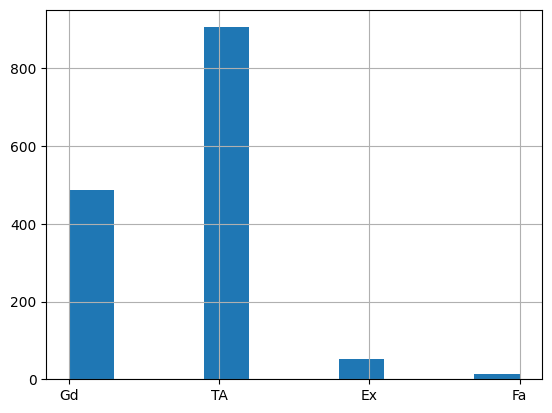

In [ ]:
df['ExterQual'].hist()

In [ ]:
df['ExterQual'] = df['ExterQual'].apply(lambda x: ExterQual[x])
df['ExterQual']

0       4
1       3
2       4
3       3
4       4
       ..
1455    3
1456    3
1457    5
1458    3
1459    4
Name: ExterQual, Length: 1460, dtype: int64

In [ ]:
# Create mappings per the metadata to go from strings to ordinal (numbers)

HeatingQC = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}

df['HeatingQC'] = df['HeatingQC'].apply(lambda x: HeatingQC[x])
df['HeatingQC']

0       5
1       5
2       5
3       4
4       5
       ..
1455    5
1456    3
1457    5
1458    4
1459    4
Name: HeatingQC, Length: 1460, dtype: int64

In [ ]:
# Create mappings per the metadata to go from strings to ordinal (numbers)

KitchenQual = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}

df['KitchenQual'] = df['KitchenQual'].apply(lambda x: KitchenQual[x])
df['KitchenQual']

0       4
1       3
2       4
3       4
4       4
       ..
1455    3
1456    3
1457    4
1458    4
1459    3
Name: KitchenQual, Length: 1460, dtype: int64

In [ ]:
# Create mappings per the metadata to go from strings to ordinal (numbers)

ExterCond = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}

df['ExterCond'] = df['ExterCond'].apply(lambda x: ExterCond[x])
df['ExterCond']

0       3
1       3
2       3
3       3
4       3
       ..
1455    3
1456    3
1457    4
1458    3
1459    3
Name: ExterCond, Length: 1460, dtype: int64

In [ ]:
string_ords

['ExterQual',
 'HeatingQC',
 'FireplaceQu',
 'KitchenQual',
 'PavedDrive',
 'Functional',
 'ExterCond']

In [ ]:
# Create mappings per the metadata to go from strings to ordinal (numbers)

FireplaceQu = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

df['FireplaceQu'] = df['FireplaceQu'].apply(lambda x: FireplaceQu[x])
df['FireplaceQu']

0       0
1       3
2       3
3       4
4       3
       ..
1455    3
1456    3
1457    4
1458    0
1459    0
Name: FireplaceQu, Length: 1460, dtype: int64

In [ ]:
# Create mappings per the metadata to go from strings to ordinal (numbers)

PavedDrive = {'Y':2, 'P': 1, 'N': 0}

df['PavedDrive'] = df['PavedDrive'].apply(lambda x: PavedDrive[x])
df['PavedDrive']

0       2
1       2
2       2
3       2
4       2
       ..
1455    2
1456    2
1457    2
1458    2
1459    2
Name: PavedDrive, Length: 1460, dtype: int64

In [ ]:
# Create mappings per the metadata to go from strings to ordinal (numbers)

Functional = {'Typ':8, 'Min1': 7, 'Min2': 6, 'Mod':5, 'Maj1':4, 'Maj2':3,
              'Sev':2, 'Sal':1}

df['Functional'] = df['Functional'].apply(lambda x: Functional[x])
df['Functional']

0       8
1       8
2       8
3       8
4       8
       ..
1455    8
1456    7
1457    8
1458    8
1459    8
Name: Functional, Length: 1460, dtype: int64

In [ ]:
feats = ordinals
X = df[feats].copy()
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive
0,7,5,4,3,5,1,0,2,1,4,8,8,0,0,2,2
1,6,8,3,3,5,0,1,2,0,3,6,8,1,3,2,2
2,7,5,4,3,5,1,0,2,1,4,6,8,1,3,2,2
3,7,5,3,3,4,1,0,1,0,4,7,8,1,4,3,2
4,8,5,4,3,5,1,0,2,1,4,9,8,1,3,3,2


In [ ]:
out = regress(X, y, indices, Notes='all ordinal ex na feats')
out

{'Features': Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
        'PavedDrive'],
       dtype='object'),
 '# of features': 16,
 'Train MAE': 25757.485361311847,
 'Test MAE': 25197.364438648758,
 'Train RMSE': 38439.83665910621,
 'Test RMSE': 38592.617555005345,
 'Model Type': LinearRegression(),
 'Notes': ''}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf

,Features,# of features,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type,Notes
0,"Index(['OverallQual'], dtype='object')",1,33091.309835,35858.985089,47938.188759,51141.625576,LinearRegression(),baseline using single most correlated feature
1,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28377.743000,29889.233567,42351.879086,42973.335333,LinearRegression(),2 highest correlated features
2,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",18,24959.223763,24251.451902,40600.397565,42234.937489,LinearRegression(),all numerical ex na feats
3,"Index(['OverallQual', 'OverallCond', 'ExterQua...",16,25757.485361,25197.364439,38439.836659,38592.617555,LinearRegression(),all ordinal ex na feats
4,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24754.957800,24677.199420,36795.481737,37439.452653,LinearRegression(),


## 5th

- Further clean up Ordinals with NAs

- Turns out the ordinals with NA can basically be treated as string values

In [ ]:
na_ords = ['BsmtFinType1', 'BsmtQual', 'BsmtCond', 'BsmtFinType2', 'BsmtExposure',
           'GarageQual', 'GarageFinish', 'GarageCond']

In [ ]:
df[na_ords]

,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond
0,GLQ,Gd,TA,Unf,No,TA,RFn,TA
1,ALQ,Gd,TA,Unf,Gd,TA,RFn,TA
2,GLQ,Gd,TA,Unf,Mn,TA,RFn,TA
3,ALQ,TA,Gd,Unf,No,TA,Unf,TA
4,GLQ,Gd,TA,Unf,Av,TA,RFn,TA
...,...,...,...,...,...,...,...,...
1455,Unf,Gd,TA,Unf,No,TA,RFn,TA
1456,ALQ,Gd,TA,Rec,No,TA,Unf,TA
1457,GLQ,TA,Gd,Unf,No,TA,RFn,TA
1458,GLQ,TA,TA,Rec,Mn,TA,Unf,TA


In [ ]:
# Define maps for the remaining

BsmtFinType1 = {'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Unf':2, np.nan:1}

BsmtQual = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

BsmtCond = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

BsmtFinType2 = {'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Unf':2, np.nan:1}

BsmtExposure = {'Gd':5, 'Av':4, 'Mn':3, 'No':2, np.nan:1}

GarageQual = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

GarageFinish = {'Fin':4, 'RFn':3, 'Unf':2, np.nan:1}

GarageCond = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

In [ ]:
# alter data

df['BsmtFinType1'] = df['BsmtFinType1'].apply(lambda x: BsmtFinType1[x])

df['BsmtQual'] = df['BsmtQual'].apply(lambda x: BsmtQual[x])

df['BsmtCond'] = df['BsmtCond'].apply(lambda x: BsmtCond[x])

df['BsmtFinType2'] = df['BsmtFinType2'].apply(lambda x: BsmtFinType2[x])

df['BsmtExposure'] = df['BsmtExposure'].apply(lambda x: BsmtExposure[x])

df['GarageQual'] = df['GarageQual'].apply(lambda x: GarageQual[x])

df['GarageFinish'] = df['GarageFinish'].apply(lambda x: GarageFinish[x])

df['GarageCond'] = df['GarageCond'].apply(lambda x: GarageCond[x])

In [ ]:
# define all ordinals

all_ords = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
'FireplaceQu', 'GarageCars', 'PavedDrive',
'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'BsmtFinType2', 'BsmtExposure', 'GarageQual', 'GarageFinish', 'GarageCond']

In [ ]:
feats = all_ords
X = df[feats].copy()
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond
0,7,5,4,3,5,1,0,2,1,4,8,8,0,0,2,2,7,4,3,2,2,3,3,3
1,6,8,3,3,5,0,1,2,0,3,6,8,1,3,2,2,6,4,3,2,5,3,3,3
2,7,5,4,3,5,1,0,2,1,4,6,8,1,3,2,2,7,4,3,2,3,3,3,3
3,7,5,3,3,4,1,0,1,0,4,7,8,1,4,3,2,6,3,4,2,2,3,2,3
4,8,5,4,3,5,1,0,2,1,4,9,8,1,3,3,2,7,4,3,2,4,3,3,3


In [ ]:
out = regress(X, y, indices, Notes='all ordinal with NAs corrected')
out

{'Features': Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
        'PavedDrive', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'BsmtFinType2',
        'BsmtExposure', 'GarageQual', 'GarageFinish', 'GarageCond'],
       dtype='object'),
 '# of features': 24,
 'Train MAE': 24754.957799975175,
 'Test MAE': 24677.199420458102,
 'Train RMSE': 36795.48173713285,
 'Test RMSE': 37439.45265256858,
 'Model Type': LinearRegression(),
 'Notes': ''}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf

,Features,# of features,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type,Notes
0,"Index(['OverallQual'], dtype='object')",1,33091.309835,35858.985089,47938.188759,51141.625576,LinearRegression(),baseline using single most correlated feature
1,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28377.743000,29889.233567,42351.879086,42973.335333,LinearRegression(),2 highest correlated features
2,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",18,24959.223763,24251.451902,40600.397565,42234.937489,LinearRegression(),all numerical ex na feats
3,"Index(['OverallQual', 'OverallCond', 'ExterQua...",16,25757.485361,25197.364439,38439.836659,38592.617555,LinearRegression(),all ordinal ex na feats
4,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24754.957800,24677.199420,36795.481737,37439.452653,LinearRegression(),all ordinal with NAs corrected


## 6th

- fix NA on remaining continuous

In [ ]:
na_cont = ['GarageYrBlt', 'MasVnrArea', 'LotFrontage']

In [ ]:
df[na_cont]

,GarageYrBlt,MasVnrArea,LotFrontage
0,2003.0,196.0,65.0
1,1976.0,0.0,80.0
2,2001.0,162.0,68.0
3,1998.0,0.0,60.0
4,2000.0,350.0,84.0
...,...,...,...
1455,1999.0,0.0,62.0
1456,1978.0,119.0,85.0
1457,1941.0,0.0,66.0
1458,1950.0,0.0,68.0


- I think it makes sense to drop *GarageYrBlt* for this linear regression model, however if we were using some tree based method, I guess we could put a 0 for NA values and create another column that indicates whether or not there was a value for this column.

- For the two remaining with NA, I think it makes sense to put a 0 for NA

In [ ]:
df.loc[:, ['MasVnrArea', 'LotFrontage']] = df[['MasVnrArea', 'LotFrontage']].fillna(0)

In [ ]:
df = df.drop(columns='GarageYrBlt')

In [ ]:
# Now create new list with all numerical features

all_nums = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea', 'MasVnrArea', 'LotFrontage']

In [ ]:
feats = all_nums
X = df[feats].copy()
X.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MasVnrArea,LotFrontage
0,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,196.0,65.0
1,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0.0,80.0
2,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,162.0,68.0
3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0.0,60.0
4,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,350.0,84.0


In [ ]:
out = regress(X, y, indices, Notes='all continuous with NAs corrected')
out

{'Features': Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MasVnrArea', 'LotFrontage'],
       dtype='object'),
 '# of features': 20,
 'Train MAE': 24629.827526294364,
 'Test MAE': 23951.712432019514,
 'Train RMSE': 40132.79546146296,
 'Test RMSE': 41937.05958157743,
 'Model Type': LinearRegression(),
 'Notes': 'all continuous with NAs corrected'}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf

<ipython-input-141-882ab11d5c1e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type,Notes
0,"Index(['OverallQual'], dtype='object')",1,33091.309835,35858.985089,47938.188759,51141.625576,LinearRegression(),baseline using single most correlated feature
1,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28377.743000,29889.233567,42351.879086,42973.335333,LinearRegression(),2 highest correlated features
2,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",18,24959.223763,24251.451902,40600.397565,42234.937489,LinearRegression(),all numerical ex na feats
3,"Index(['OverallQual', 'OverallCond', 'ExterQua...",16,25757.485361,25197.364439,38439.836659,38592.617555,LinearRegression(),all ordinal ex na feats
4,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24754.957800,24677.199420,36795.481737,37439.452653,LinearRegression(),all ordinal with NAs corrected
5,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",20,24629.827526,23951.712432,40132.795461,41937.059582,LinearRegression(),all continuous with NAs corrected


## 7th

- Scale numerical

In [ ]:
# Now create new list with all numerical features

all_nums = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea', 'MasVnrArea', 'LotFrontage']

In [ ]:
feats = all_nums
X = df[feats].copy()
X.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MasVnrArea,LotFrontage
0,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,196.0,65.0
1,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0.0,80.0
2,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,162.0,68.0
3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0.0,60.0
4,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,350.0,84.0


In [ ]:
out = regress(X, y, indices, scale=True, Notes='all continuous scaled')
out

{'Features': Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MasVnrArea', 'LotFrontage'],
       dtype='object'),
 '# of features': 20,
 'Train MAE': 24629.827526294357,
 'Test MAE': 23951.71243201952,
 'Train RMSE': 40132.79546146297,
 'Test RMSE': 41937.059581577436,
 'Model Type': LinearRegression(),
 'Notes': 'all continuous scaled'}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf

<ipython-input-148-882ab11d5c1e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type,Notes
0,"Index(['OverallQual'], dtype='object')",1,33091.309835,35858.985089,47938.188759,51141.625576,LinearRegression(),baseline using single most correlated feature
1,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28377.743000,29889.233567,42351.879086,42973.335333,LinearRegression(),2 highest correlated features
2,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",18,24959.223763,24251.451902,40600.397565,42234.937489,LinearRegression(),all numerical ex na feats
3,"Index(['OverallQual', 'OverallCond', 'ExterQua...",16,25757.485361,25197.364439,38439.836659,38592.617555,LinearRegression(),all ordinal ex na feats
4,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24754.957800,24677.199420,36795.481737,37439.452653,LinearRegression(),all ordinal with NAs corrected
5,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",20,24629.827526,23951.712432,40132.795461,41937.059582,LinearRegression(),all continuous with NAs corrected
6,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",20,24629.827526,23951.712432,40132.795461,41937.059582,LinearRegression(),all continuous scaled


## 8th

- All continuous and ordinal

In [ ]:
# Now create new list with all numerical features

nums_and_ords = all_nums + all_ords

In [ ]:
feats = nums_and_ords
X = df[feats].copy()
X.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MasVnrArea,LotFrontage,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond
0,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,196.0,65.0,7,5,4,3,5,1,0,2,1,4,8,8,0,0,2,2,7,4,3,2,2,3,3,3
1,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0.0,80.0,6,8,3,3,5,0,1,2,0,3,6,8,1,3,2,2,6,4,3,2,5,3,3,3
2,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,162.0,68.0,7,5,4,3,5,1,0,2,1,4,6,8,1,3,2,2,7,4,3,2,3,3,3,3
3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0.0,60.0,7,5,3,3,4,1,0,1,0,4,7,8,1,4,3,2,6,3,4,2,2,3,2,3
4,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,350.0,84.0,8,5,4,3,5,1,0,2,1,4,9,8,1,3,3,2,7,4,3,2,4,3,3,3


In [ ]:
out = regress(X, y, indices, Notes='all continuous and ordinal')
out

{'Features': Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MasVnrArea', 'LotFrontage',
        'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
        'PavedDrive', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'BsmtFinType2',
        'BsmtExposure', 'GarageQual', 'GarageFinish', 'GarageCond'],
       dtype='object'),
 '# of features': 44,
 'Train MAE': 20932.16096632725,
 'Test MAE': 20832.619035830492,
 'Train RMSE': 33432.95432637029,
 'Test RMSE': 36039.59409976369,
 'Model Type': LinearRegression(),
 'Notes': 'all continuous and ordinal'}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf

<ipython-input-155-882ab11d5c1e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type,Notes
0,"Index(['OverallQual'], dtype='object')",1,33091.309835,35858.985089,47938.188759,51141.625576,LinearRegression(),baseline using single most correlated feature
1,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28377.743000,29889.233567,42351.879086,42973.335333,LinearRegression(),2 highest correlated features
2,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",18,24959.223763,24251.451902,40600.397565,42234.937489,LinearRegression(),all numerical ex na feats
3,"Index(['OverallQual', 'OverallCond', 'ExterQua...",16,25757.485361,25197.364439,38439.836659,38592.617555,LinearRegression(),all ordinal ex na feats
4,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24754.957800,24677.199420,36795.481737,37439.452653,LinearRegression(),all ordinal with NAs corrected
5,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",20,24629.827526,23951.712432,40132.795461,41937.059582,LinearRegression(),all continuous with NAs corrected
6,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",20,24629.827526,23951.712432,40132.795461,41937.059582,LinearRegression(),all continuous scaled
7,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",44,20932.160966,20832.619036,33432.954326,36039.594100,LinearRegression(),all continuous and ordinal


## 9th

- Take top 10 correlations

In [ ]:
# create series of correlations of each numeric feature with target
correlations = pd.Series({i: df[i].corr(y) for i in nums_and_ords})

In [ ]:
top_ten = correlations.sort_values(ascending=False)[:10].index
top_ten

Index(['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath'],
      dtype='object')

In [ ]:
feats = top_ten
X = df[feats].copy()
X.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,FullBath
0,7,1710,4,4,2,548,856,856,4,2
1,6,1262,3,3,2,460,1262,1262,4,2
2,7,1786,4,4,2,608,920,920,4,2
3,7,1717,3,4,3,642,756,961,3,1
4,8,2198,4,4,3,836,1145,1145,4,2


In [ ]:
out = regress(X, y, indices, Notes='top 10 features by correlation')
out

{'Features': Index(['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars',
        'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath'],
       dtype='object'),
 '# of features': 10,
 'Train MAE': 23699.20169337798,
 'Test MAE': 22981.972327340758,
 'Train RMSE': 37450.1431354372,
 'Test RMSE': 33897.21724795074,
 'Model Type': LinearRegression(),
 'Notes': 'top 10 features by correlation'}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf

<ipython-input-165-882ab11d5c1e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type,Notes
0,"Index(['OverallQual'], dtype='object')",1,33091.309835,35858.985089,47938.188759,51141.625576,LinearRegression(),baseline using single most correlated feature
1,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28377.743000,29889.233567,42351.879086,42973.335333,LinearRegression(),2 highest correlated features
2,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",18,24959.223763,24251.451902,40600.397565,42234.937489,LinearRegression(),all numerical ex na feats
3,"Index(['OverallQual', 'OverallCond', 'ExterQua...",16,25757.485361,25197.364439,38439.836659,38592.617555,LinearRegression(),all ordinal ex na feats
4,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24754.957800,24677.199420,36795.481737,37439.452653,LinearRegression(),all ordinal with NAs corrected
5,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",20,24629.827526,23951.712432,40132.795461,41937.059582,LinearRegression(),all continuous with NAs corrected
6,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",20,24629.827526,23951.712432,40132.795461,41937.059582,LinearRegression(),all continuous scaled
7,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",44,20932.160966,20832.619036,33432.954326,36039.594100,LinearRegression(),all continuous and ordinal
8,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",10,23699.201693,22981.972327,37450.143135,33897.217248,LinearRegression(),top 10 features by correlation


## 10th

- Use PCA transformation, shrink to 10 largest eigenvectors

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# define new function for PCA

def regress_pca(X, y, indices, Notes='', scale=False, model=LinearRegression()):
  '''
  Fits a model on the features "X" and targets "y"
  default is a LinearRegression model

  X and y are pandas DataFrames

  indices is a tuple with numpy arrays indicating the indices for train and
    test set
    The first element in the tuple indicates the train indices

  returns a dictionary with relevant hyperparameters and metrics
  '''

  X_train, X_test, y_train, y_test = X.iloc[indices[0]].copy(), X.iloc[indices[1]].copy(), \
      y.iloc[indices[0]].copy(), y.iloc[indices[1]].copy()

  if scale:
    scaler = PCA(n_components=10)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

  # defining the model
  model = LinearRegression()

  # train/fit the model
  model.fit(X_train, y_train)

  # create hyperparameter dictionary
  hypers = {'Features':X.columns, '# of features':len(X.columns), \
            'Train MAE':mean_absolute_error(y_train, model.predict(X_train)), \
            'Test MAE':mean_absolute_error(y_test, model.predict(X_test)), \
            'Train RMSE':mean_squared_error(y_train, model.predict(X_train)) ** 0.5, \
            'Test RMSE':mean_squared_error(y_test, model.predict(X_test)) ** 0.5, \
            'Model Type':model, \
            "Notes":Notes}

  return hypers

In [ ]:
feats = nums_and_ords
X = df[feats].copy()
X.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MasVnrArea,LotFrontage,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond
0,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,196.0,65.0,7,5,4,3,5,1,0,2,1,4,8,8,0,0,2,2,7,4,3,2,2,3,3,3
1,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0.0,80.0,6,8,3,3,5,0,1,2,0,3,6,8,1,3,2,2,6,4,3,2,5,3,3,3
2,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,162.0,68.0,7,5,4,3,5,1,0,2,1,4,6,8,1,3,2,2,7,4,3,2,3,3,3,3
3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0.0,60.0,7,5,3,3,4,1,0,1,0,4,7,8,1,4,3,2,6,3,4,2,2,3,2,3
4,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,350.0,84.0,8,5,4,3,5,1,0,2,1,4,9,8,1,3,3,2,7,4,3,2,4,3,3,3


In [ ]:
out = regress_pca(X, y, indices, scale=True, Notes='all continuous and ordinal shrunk to 10 eigenvectors')
out

(1168, 10) (292, 10)


{'Features': Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MasVnrArea', 'LotFrontage',
        'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
        'PavedDrive', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'BsmtFinType2',
        'BsmtExposure', 'GarageQual', 'GarageFinish', 'GarageCond'],
       dtype='object'),
 '# of features': 44,
 'Train MAE': 27328.6984587037,
 'Test MAE': 26126.79815893526,
 'Train RMSE': 44959.67609200455,
 'Test RMSE': 39437.11110265834,
 'Model Type': LinearRegression(),
 'Notes': 'all continuous and ordinal shrunk to 10 eigenvectors'}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf

<ipython-input-171-882ab11d5c1e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type,Notes
0,"Index(['OverallQual'], dtype='object')",1,33091.309835,35858.985089,47938.188759,51141.625576,LinearRegression(),baseline using single most correlated feature
1,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28377.743000,29889.233567,42351.879086,42973.335333,LinearRegression(),2 highest correlated features
2,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",18,24959.223763,24251.451902,40600.397565,42234.937489,LinearRegression(),all numerical ex na feats
3,"Index(['OverallQual', 'OverallCond', 'ExterQua...",16,25757.485361,25197.364439,38439.836659,38592.617555,LinearRegression(),all ordinal ex na feats
4,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24754.957800,24677.199420,36795.481737,37439.452653,LinearRegression(),all ordinal with NAs corrected
5,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",20,24629.827526,23951.712432,40132.795461,41937.059582,LinearRegression(),all continuous with NAs corrected
6,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",20,24629.827526,23951.712432,40132.795461,41937.059582,LinearRegression(),all continuous scaled
7,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",44,20932.160966,20832.619036,33432.954326,36039.594100,LinearRegression(),all continuous and ordinal
8,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",10,23699.201693,22981.972327,37450.143135,33897.217248,LinearRegression(),top 10 features by correlation
9,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",44,27328.698459,26126.798159,44959.676092,39437.111103,LinearRegression(),all continuous and ordinal shrunk to 10 eigenv...


In [ ]:
hyperdf.sort_values('Test RMSE')

,Features,# of features,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type,Notes
8,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",10,23699.201693,22981.972327,37450.143135,33897.217248,LinearRegression(),top 10 features by correlation
7,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",44,20932.160966,20832.619036,33432.954326,36039.594100,LinearRegression(),all continuous and ordinal
4,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24754.957800,24677.199420,36795.481737,37439.452653,LinearRegression(),all ordinal with NAs corrected
3,"Index(['OverallQual', 'OverallCond', 'ExterQua...",16,25757.485361,25197.364439,38439.836659,38592.617555,LinearRegression(),all ordinal ex na feats
9,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",44,27328.698459,26126.798159,44959.676092,39437.111103,LinearRegression(),all continuous and ordinal shrunk to 10 eigenv...
5,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",20,24629.827526,23951.712432,40132.795461,41937.059582,LinearRegression(),all continuous with NAs corrected
6,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",20,24629.827526,23951.712432,40132.795461,41937.059582,LinearRegression(),all continuous scaled
2,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",18,24959.223763,24251.451902,40600.397565,42234.937489,LinearRegression(),all numerical ex na feats
1,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28377.743000,29889.233567,42351.879086,42973.335333,LinearRegression(),2 highest correlated features
0,"Index(['OverallQual'], dtype='object')",1,33091.309835,35858.985089,47938.188759,51141.625576,LinearRegression(),baseline using single most correlated feature
